In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 10
    # variables        = 2
    chi-square         = 0.00505747
    reduced chi-square = 6.3218e-04
    Akaike info crit   = -71.8947443
    Bayesian info crit = -71.2895741
[[Variables]]
    x10:  5 (fixed)
    x20:  0 (fixed)
    x30:  0 (fixed)
    k0:   0.12183302 +/- 0.00590992 (4.85%) (init = 0.2)
    k1:   0.77583947 +/- 0.02663943 (3.43%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, k1) =  0.809


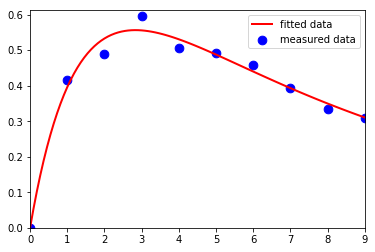

In [68]:
def f(y, t, paras):
    """
    Your system of differential equations
    """

    x1 = y[0]
    x2 = y[1]
    x3 = y[2]

    try:
        k0 = paras['k0'].value
        k1 = paras['k1'].value

    except KeyError:
        k0, k1 = paras
    # the model equations
    f0 = -k0 * x1
    f1 = k0 * x1 - k1 * x2
    f2 = k1 * x2
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):

    """
    compute the residual between actual data and fitted data
    """

    x0 = paras['x10'].value, paras['x20'].value, paras['x30'].value
    model = g(t, x0, paras)

    # you only have data for one of your variables
    x2_model = model[:, 1]
    return (x2_model - data).ravel()


# initial conditions
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

# measured data
#Notice you do not have data at ALL times
#YOu do not have data for ALL variables
t_measured = np.linspace(0, 9, 10)
x2_measured = np.array([0.000, 0.416, 0.489, 0.595, 0.506, 0.493, 0.458, 0.394, 0.335, 0.309])

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)

#These are the two kinetic rates, they do not know them. 
params.add('k0', value=0.2, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

# fit model
#This next line DOES the minimization
result = minimize(residual, params, args=(t_measured, x2_measured), method='leastsq')  # leastsq nelder

# check results of the fit
data_fitted = g(np.linspace(0., 9., 100), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0., 9., 100), data_fitted[:, 1], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()

In [44]:
np.linspace(0, 19, 20)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [11]:
paras = ["0","1"]

In [12]:
paras[0]

'0'

In [2]:
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

In [23]:
# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()

In [24]:
params

name,value,initial value,min,max,vary


In [25]:
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)

In [26]:
params

name,value,initial value,min,max,vary
x10,5.00000000,5.0,-inf,inf,False
x20,0.00000000,0,-inf,inf,False
x30,0.00000000,0,-inf,inf,False


In [27]:
#These are the two kinetic rates, they do not know them. 
params.add('k0', value=0.2, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

In [28]:
params

name,value,initial value,min,max,vary
x10,5.00000000,5.0,-inf,inf,False
x20,0.00000000,0,-inf,inf,False
x30,0.00000000,0,-inf,inf,False
k0,0.20000000,0.2,1.0000e-04,2.00000000,True
k1,0.30000000,0.3,1.0000e-04,2.00000000,True


In [32]:
try:
    k0 = paras['k0'].value
    k1 = paras['k1'].value
except KeyError:
    k0, k1 = paras

ValueError: too many values to unpack (expected 2)

In [31]:
k0

0.2

In [37]:
t_measured

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [48]:
18 * 24

432

In [60]:
u = np.array([4.0, np.nan, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2, 4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])

In [61]:
u

array([4.    ,    nan, 2.    , 1.    , 0.5   , 0.25  , 0.167 , 0.125 ,
       0.1   , 0.0833, 0.0714, 0.0625])

In [54]:
y

array([0.1957, 0.1947, 0.1735, 0.16  , 0.0844, 0.0627, 0.0456, 0.0342,
       0.0323, 0.0235, 0.0246])

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 10
    # variables        = 2
    chi-square         = 0.00352157
    reduced chi-square = 4.4020e-04
    Akaike info crit   = -75.5143263
    Bayesian info crit = -74.9091561
[[Variables]]
    x10:  5 (fixed)
    x20:  0 (fixed)
    x30:  0 (fixed)
    k0:   0.07095162 +/- 0.00286405 (4.04%) (init = 0.2)
    k1:   0.45848184 +/- 0.01343007 (2.93%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, k1) =  0.815


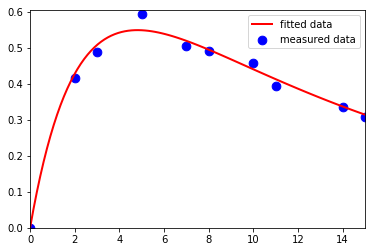

In [73]:
def f(y, t, paras):
    """
    Your system of differential equations
    """
    #Set parameters
    x1 = y[0]
    x2 = y[1]
    x3 = y[2]

    try:
        k0 = paras['k0'].value
        k1 = paras['k1'].value

    except KeyError:
        k0, k1 = paras
    # the model equations
    f0 = -k0 * x1
    f1 = k0 * x1 - k1 * x2
    f2 = k1 * x2
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):

    """
    compute the residual between actual data and fitted data
    """

    x0 = paras['x10'].value, paras['x20'].value, paras['x30'].value
    model = g(t, x0, paras)

    # you only have data for one of your variables
    x2_model = model[:, 1]
    return (x2_model - data).ravel()


# initial conditions
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

# measured data
#Notice you do not have data at ALL times
#YOu do not have data for ALL variables
t_measured = np.linspace(0, 15, 16)
x2_measured = np.array([0.000, np.nan, 0.416, 0.489, np.nan, 0.595, np.nan, 0.506, 0.493, np.nan,
                        0.458, 0.394, np.nan, np.nan, 0.335, 0.309])

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)

#These are the two kinetic rates, they do not know them. 
params.add('k0', value=0.2, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

# fit model
#This next line DOES the minimization
result = minimize(residual, params, args=(t_measured, x2_measured), method='leastsq', nan_policy='omit')  # leastsq nelder

# check results of the fit
data_fitted = g(np.linspace(0., 15., 100), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0., 15., 100), data_fitted[:, 1], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()

In [74]:
params

name,value,initial value,min,max,vary
x10,5.00000000,5.0,-inf,inf,False
x20,0.00000000,0,-inf,inf,False
x30,0.00000000,0,-inf,inf,False
k0,0.20000000,0.2,1.0000e-04,2.00000000,True
k1,0.30000000,0.3,1.0000e-04,2.00000000,True


In [84]:
data_fitted[:,2]

array([0.00000000e+00, 1.81793394e-03, 7.08228365e-03, 1.55236291e-02,
       2.68909968e-02, 4.09507366e-02, 5.74851598e-02, 7.62916683e-02,
       9.71816203e-02, 1.19979427e-01, 1.44521663e-01, 1.70656250e-01,
       1.98241699e-01, 2.27146369e-01, 2.57247805e-01, 2.88432177e-01,
       3.20593643e-01, 3.53633792e-01, 3.87461181e-01, 4.21990858e-01,
       4.57143909e-01, 4.92847056e-01, 5.29032275e-01, 5.65636441e-01,
       6.02600994e-01, 6.39871629e-01, 6.77398006e-01, 7.15133483e-01,
       7.53034864e-01, 7.91062168e-01, 8.29178395e-01, 8.67349343e-01,
       9.05543402e-01, 9.43731383e-01, 9.81886353e-01, 1.01998348e+00,
       1.05799988e+00, 1.09591449e+00, 1.13370797e+00, 1.17136252e+00,
       1.20886184e+00, 1.24619098e+00, 1.28333627e+00, 1.32028523e+00,
       1.35702649e+00, 1.39354968e+00, 1.42984542e+00, 1.46590518e+00,
       1.50172128e+00, 1.53728681e+00, 1.57259555e+00, 1.60764197e+00,
       1.64242113e+00, 1.67692869e+00, 1.71116081e+00, 1.74511417e+00,
      

In [83]:
data_fitted

array([[5.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.94653666e+00, 5.16454076e-02, 1.81793394e-03],
       [4.89364498e+00, 9.92727339e-02, 7.08228365e-03],
       [4.84131886e+00, 1.43157511e-01, 1.55236291e-02],
       [4.78955224e+00, 1.83556761e-01, 2.68909968e-02],
       [4.73833915e+00, 2.20710114e-01, 4.09507366e-02],
       [4.68767366e+00, 2.54841180e-01, 5.74851598e-02],
       [4.63754992e+00, 2.86158412e-01, 7.62916683e-02],
       [4.58796214e+00, 3.14856243e-01, 9.71816203e-02],
       [4.53890458e+00, 3.41115994e-01, 1.19979427e-01],
       [4.49037158e+00, 3.65106759e-01, 1.44521663e-01],
       [4.44235752e+00, 3.86986226e-01, 1.70656250e-01],
       [4.39485687e+00, 4.06901433e-01, 1.98241699e-01],
       [4.34786412e+00, 4.24989510e-01, 2.27146369e-01],
       [4.30137385e+00, 4.41378343e-01, 2.57247805e-01],
       [4.25538069e+00, 4.56187135e-01, 2.88432177e-01],
       [4.20987931e+00, 4.69527043e-01, 3.20593643e-01],
       [4.16486447e+00, 4.81501